In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('Online Retail.xlsx')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Out of these 7 columns all are not essential. The non essential comumns include 'InvoiceNo','StockCode','Description'
These columns can be dropped from our dataset

In [4]:
df.drop(['InvoiceNo','StockCode','Description'],axis=1,inplace=True)
df.head()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df['Transaction Amount'] = df['Quantity']*df['UnitPrice']
df.head()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction Amount
0,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Quantity            541909 non-null  int64         
 1   InvoiceDate         541909 non-null  datetime64[ns]
 2   UnitPrice           541909 non-null  float64       
 3   CustomerID          406829 non-null  float64       
 4   Country             541909 non-null  object        
 5   Transaction Amount  541909 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 24.8+ MB


In [7]:
df.isnull().sum()

Quantity                   0
InvoiceDate                0
UnitPrice                  0
CustomerID            135080
Country                    0
Transaction Amount         0
dtype: int64

In [8]:
null_percentage = (df['CustomerID'].isnull().sum()/len(df))*100
print('Null Percentage: {}'.format(null_percentage))

Null Percentage: 24.926694334288598


In [9]:
null_transactions = df[df['CustomerID'].isnull()]
tot_null_transaction_amount = null_transactions['Transaction Amount'].sum()
transaction_proportion = (tot_null_transaction_amount/df['Transaction Amount'].sum())*100
print('Proportion of Null transactions : {}'.format(transaction_proportion))

Proportion of Null transactions : 14.851452148762547


We can see the data about NULL values. But since RFM Analysis requires customer ID for grouping , we cannot consider these records.
Hence we will delete all rcords having NULL Customer ID

In [10]:
df = df.dropna(axis=0)
df.isnull().sum()

Quantity              0
InvoiceDate           0
UnitPrice             0
CustomerID            0
Country               0
Transaction Amount    0
dtype: int64

In [11]:
df.head()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction Amount
0,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [12]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

We will use frequency encoding to convert this 'Country' into numerical data

In [13]:
value_cnts = df['Country'].value_counts()

In [14]:
df['Country_encoded'] = df['Country'].map(value_cnts)
df.head()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction Amount,Country_encoded
0,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,361878
1,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,361878
2,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,361878
3,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,361878
4,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,361878


In [15]:
df.drop('Country',axis=1,inplace=True)

In [16]:
df.head()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Transaction Amount,Country_encoded
0,6,2010-12-01 08:26:00,2.55,17850.0,15.30,361878
1,6,2010-12-01 08:26:00,3.39,17850.0,20.34,361878
2,8,2010-12-01 08:26:00,2.75,17850.0,22.00,361878
3,6,2010-12-01 08:26:00,3.39,17850.0,20.34,361878
4,6,2010-12-01 08:26:00,3.39,17850.0,20.34,361878


Now we will create new dataframes for Recency, Frequency and Monetary

In [17]:
df_recency = df.drop_duplicates().groupby(by='CustomerID',as_index=False)['InvoiceDate'].max()
df_recency.columns = ['CustomerID','LastPurchaseDate']
recent_date = df_recency['LastPurchaseDate'].max()
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(lambda x : (recent_date - x).days)
df_recency.head()
df_recency.drop('LastPurchaseDate',axis=1,inplace=True)
df_recency.head()

,CustomerID,Recency
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [18]:
df_frequency = df.drop_duplicates().groupby(by='CustomerID',as_index=False)['InvoiceDate'].count()
df_frequency.columns = ['CustomerID','Frequency']
df_frequency.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,116
2,12348.0,20
3,12349.0,45
4,12350.0,9


In [19]:
df_monetary = df.drop_duplicates().groupby(by='CustomerID',as_index=False)['Transaction Amount'].sum()
df_monetary.columns = ['CustomerID','Monetary']
df_monetary.head()

,CustomerID,Monetary
0,12346.0,0.00
1,12347.0,3125.98
2,12348.0,1399.80
3,12349.0,1209.49
4,12350.0,174.20


Merging all three dataframes

In [20]:
temp1_df = df_recency.merge(right=df_frequency,how='inner',on='CustomerID')
temp1_df.head()

,CustomerID,Recency,Frequency
0,12346.0,325,2
1,12347.0,1,116
2,12348.0,74,20
3,12349.0,18,45
4,12350.0,309,9


In [21]:
final_df = temp1_df.merge(right=df_monetary,how='inner',on='CustomerID')
final_df.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,2,0.00
1,12347.0,1,116,3125.98
2,12348.0,74,20,1399.80
3,12349.0,18,45,1209.49
4,12350.0,309,9,174.20


In [22]:
country_df = df[['CustomerID','Country_encoded']].drop_duplicates()

In [23]:
final_df = final_df.merge(right=country_df,how='left',on='CustomerID')
final_df.head()

,CustomerID,Recency,Frequency,Monetary,Country_encoded
0,12346.0,325,2,0.00,361878
1,12347.0,1,116,3125.98,182
2,12348.0,74,20,1399.80,695
3,12349.0,18,45,1209.49,803
4,12350.0,309,9,174.20,1086


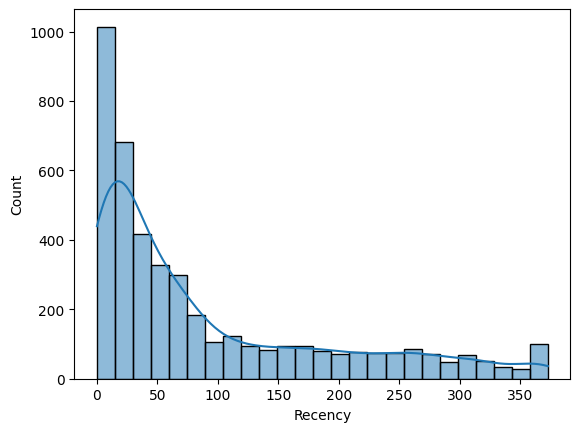

In [24]:
sns.histplot(final_df['Recency'],kde=True)
plt.show()

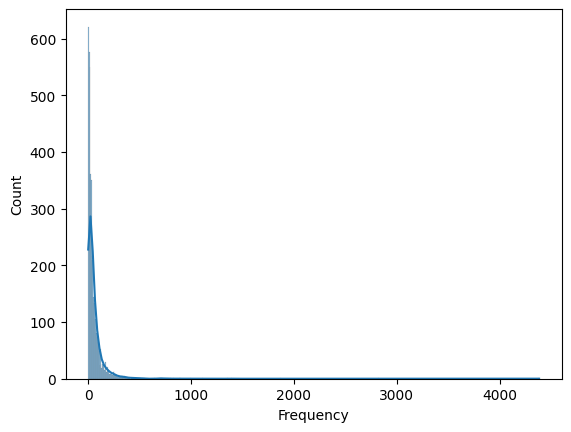

In [25]:
sns.histplot(final_df['Frequency'],kde=True)
plt.show()

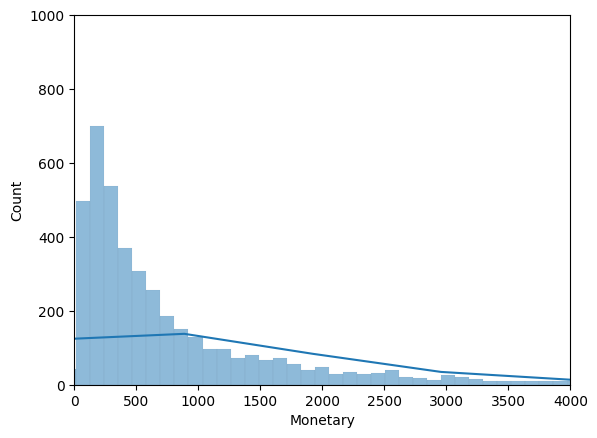

In [26]:
sns.histplot(final_df['Monetary'],kde=True)
plt.xlim(0,4000)
plt.ylim(0,1000)
plt.show()

Now since we are moving towards applying algorithm , we can delete 'CustomerID' column from our final df. It is just a uniwue identifier for the customer and do not contain any information about the behavious of cutomer

In [27]:
customer_ids = final_df['CustomerID']
final_df.drop('CustomerID',axis=1,inplace=True)
final_df.head()

,Recency,Frequency,Monetary,Country_encoded
0,325,2,0.00,361878
1,1,116,3125.98,182
2,74,20,1399.80,695
3,18,45,1209.49,803
4,309,9,174.20,1086


In [28]:
final_df.describe()

,Recency,Frequency,Monetary,Country_encoded
count,4380.000000,4380.000000,4380.000000,4380.000000
mean,90.968037,58.430822,1387.893766,326798.344064
std,100.698240,132.988364,6063.591401,106340.385334
min,0.000000,1.000000,-4287.630000,10.000000
25%,16.000000,12.000000,210.157500,361878.000000
50%,49.000000,28.000000,477.650500,361878.000000
75%,142.000000,65.000000,1136.550000,361878.000000
max,373.000000,4384.000000,201642.830000,361878.000000


We can see there are some recods with negative monetary , which is not possible. It means they are invalid recors. We should delete such records.

In [29]:
final_df = final_df[final_df['Monetary'] >= 0]
final_df.describe()

,Recency,Frequency,Monetary,Country_encoded
count,4334.000000,4334.000000,4334.000000,4334.000000
mean,89.320489,58.968620,1405.750056,326923.849562
std,99.067654,133.581569,6092.774256,106165.468723
min,0.000000,1.000000,0.000000,10.000000
25%,16.000000,12.000000,217.370000,361878.000000
50%,49.000000,28.000000,484.285000,361878.000000
75%,137.000000,65.000000,1152.722500,361878.000000
max,373.000000,4384.000000,201642.830000,361878.000000


We can see from above description that our data is not at all on same scale. So we need to scale the data. 

In [30]:
all_columns = final_df.columns
all_columns

Index(['Recency', 'Frequency', 'Monetary', 'Country_encoded'], dtype='object')

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
final_df = scaler.fit_transform(final_df)
final_df = pd.DataFrame(final_df)
final_df.columns = all_columns
final_df.head()

,Recency,Frequency,Monetary,Country_encoded
0,2.379250,-0.426520,-0.230751,0.329280
1,-0.891620,0.426990,0.282372,-3.078021
2,-0.154665,-0.291755,-0.000977,-3.073188
3,-0.720000,-0.104582,-0.032216,-3.072171
4,2.217725,-0.374111,-0.202156,-3.069505


In [32]:
final_df.describe()

,Recency,Frequency,Monetary,Country_encoded
count,4.334000e+03,4.334000e+03,4.334000e+03,4.334000e+03
mean,-1.393543e-17,9.836771e-18,1.803408e-17,1.049256e-16
std,1.000115e+00,1.000115e+00,1.000115e+00,1.000115e+00
min,-9.017151e-01,-4.340068e-01,-2.307508e-01,-3.079641e+00
25%,-7.401906e-01,-3.516506e-01,-1.950700e-01,3.292802e-01
50%,-4.070465e-01,-2.318598e-01,-1.512564e-01,3.292802e-01
75%,4.813379e-01,4.515650e-02,-4.153391e-02,3.292802e-01
max,2.863823e+00,3.238119e+01,3.286847e+01,3.292802e-01


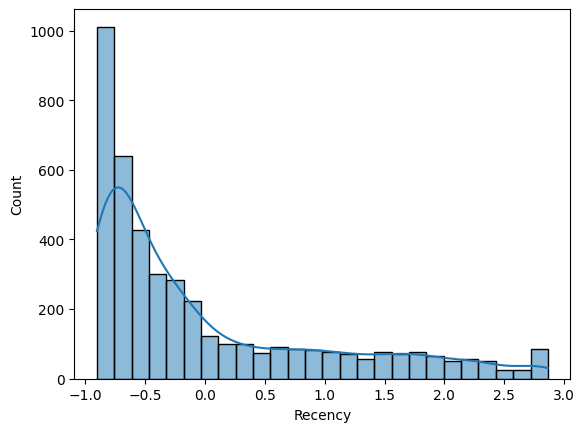

In [33]:
sns.histplot(final_df['Recency'],kde=True)
plt.show()

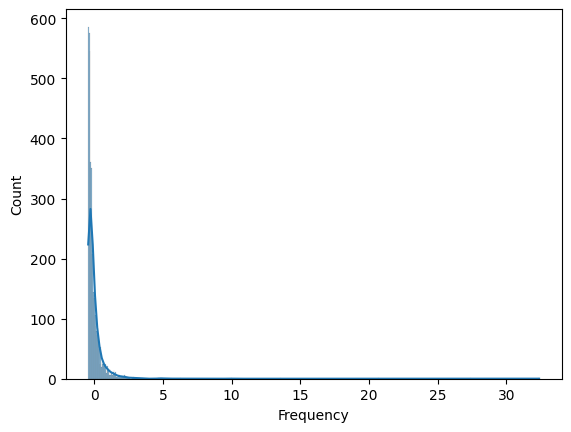

In [34]:
sns.histplot(final_df['Frequency'],kde=True)
plt.show()

We will use Elbow method to find optimal number of Clusters

In [35]:
from sklearn.cluster import KMeans

In [36]:
wcss = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(final_df)
    wcss.append(kmeans.inertia_)

c:\users\pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\pc\appdata\local\programs\python\python38\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\users\pc\appdata\local\programs\python\python38\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\users\pc\appdata\local\programs\python\python38\lib\subprocess.py", line 489, in run
 

In [37]:
wcss

[17336.000000000007,
 12972.752718473947,
 9082.200427736763,
 5899.055368263018,
 4578.243185282746,
 3519.4517753708897,
 2866.452600845404,
 2462.1926485344443,
 2086.302607338798,
 1799.1855156213996,
 1582.1423323263077,
 1422.0270663314882,
 1287.1610626766972,
 1181.8861224551486,
 1093.553643459624,
 1013.3094799531785,
 938.3421935932963,
 856.86226916081,
 787.996670281498]

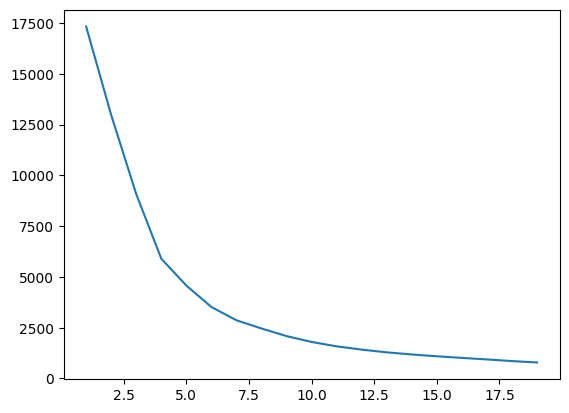

In [38]:
plt.plot(range(1,20),wcss)
plt.show()

We can see that 4 is the elbow point of the graph . So we will try to make 4 clusters

In [39]:
kmeans = KMeans(n_clusters=4,random_state=42)
kmeans.fit(final_df)

c:\users\pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=42)

We will now use PCA to reduce the dimensionality of dataset ,so that we can visualise our clustering

In [40]:
from sklearn.decomposition import PCA

In [41]:
vis_df = final_df

In [42]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(vis_df)
pca_df = pd.DataFrame(pca_data)
pca_df.columns = ['PCA1','PCA2']
pca_df.head()

,PCA1,PCA2
0,-1.401520,0.401643
1,1.099502,2.654539
2,0.152968,2.877959
3,0.481186,2.694652
4,-0.969361,3.572259


In [43]:
print(pca.explained_variance_ratio_)

[0.39454138 0.25185662]


In [44]:
pca_df['Clusters'] = kmeans.predict(final_df)
pca_df.head()

,PCA1,PCA2,Clusters
0,-1.401520,0.401643,1
1,1.099502,2.654539,2
2,0.152968,2.877959,2
3,0.481186,2.694652,2
4,-0.969361,3.572259,2


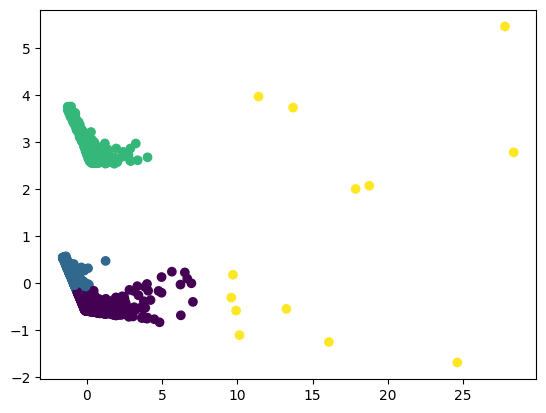

In [45]:
plt.scatter(pca_df['PCA1'],pca_df['PCA2'],c = pca_df['Clusters'])
plt.show()

In [46]:
from sklearn.metrics import silhouette_score

In [47]:
scr = silhouette_score(final_df,kmeans.predict(final_df))
print(scr)

0.5960504588879043


Now we will try Hierarchical clustering

In [48]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
hierarchical = AgglomerativeClustering(n_clusters=4)
hierarchical.fit(final_df)

AgglomerativeClustering(n_clusters=4)

In [49]:
scr = silhouette_score(final_df,hierarchical.fit_predict(final_df))
print(scr)

0.5538414180031925


We can see that score of KMeans is better than that of hierarchical. Therefore we will use the results of KMeans.

In [50]:
cluster_ids = kmeans.predict(final_df)

In [51]:
clustered_df = final_df
clustered_df = scaler.inverse_transform(clustered_df)
clustered_df = pd.DataFrame(clustered_df)
clustered_df.columns = ['Recency','Frequency','Monetary','Country_encoded']
clustered_df.head()

,Recency,Frequency,Monetary,Country_encoded
0,325.0,2.0,0.00,361878.0
1,1.0,116.0,3125.98,182.0
2,74.0,20.0,1399.80,695.0
3,18.0,45.0,1209.49,803.0
4,309.0,9.0,174.20,1086.0


In [52]:
clustered_df['Cluster_id'] = cluster_ids
clustered_df.head()

,Recency,Frequency,Monetary,Country_encoded,Cluster_id
0,325.0,2.0,0.00,361878.0,1
1,1.0,116.0,3125.98,182.0,2
2,74.0,20.0,1399.80,695.0,2
3,18.0,45.0,1209.49,803.0,2
4,309.0,9.0,174.20,1086.0,2


In [53]:
cluster_id_0 = clustered_df[clustered_df['Cluster_id'] == 0]
cluster_id_1 = clustered_df[clustered_df['Cluster_id'] == 1]
cluster_id_2 = clustered_df[clustered_df['Cluster_id'] == 2]
cluster_id_3 = clustered_df[clustered_df['Cluster_id'] == 3]

In [54]:
print("Average Recency for cluster 0 : {}".format(cluster_id_0['Recency'].mean()))
print("Average Recency for cluster 1 : {}".format(cluster_id_1['Recency'].mean()))
print("Average Recency for cluster 2 : {}".format(cluster_id_2['Recency'].mean()))
print("Average Recency for cluster 3 : {}".format(cluster_id_3['Recency'].mean()))

Average Recency for cluster 0 : 38.56619911050291
Average Recency for cluster 1 : 241.24642126789365
Average Recency for cluster 2 : 91.42619047619047
Average Recency for cluster 3 : 3.6923076923076925


In [55]:
print("Avreage Frequency for cluster 0 : {}".format(cluster_id_0['Frequency'].mean()))
print("Avreage Frequency for cluster 1 : {}".format(cluster_id_1['Frequency'].mean()))
print("Avreage Frequency for cluster 2 : {}".format(cluster_id_2['Frequency'].mean()))
print("Avreage Frequency for cluster 3 : {}".format(cluster_id_3['Frequency'].mean()))

Avreage Frequency for cluster 0 : 66.33869312350325
Avreage Frequency for cluster 1 : 18.648261758691206
Avreage Frequency for cluster 2 : 53.13333333333333
Avreage Frequency for cluster 3 : 1623.6923076923076


In [56]:
print("Average Monetary for cluster 0 : {}".format(cluster_id_0['Monetary'].mean()))
print("Average Monetary for cluster 1 : {}".format(cluster_id_1['Monetary'].mean()))
print("Average Monetary for cluster 2 : {}".format(cluster_id_2['Monetary'].mean()))
print("Average Monetary for cluster 3 : {}".format(cluster_id_3['Monetary'].mean()))

Average Monetary for cluster 0 : 1395.4929295244613
Average Monetary for cluster 1 : 344.93775153374236
Average Monetary for cluster 2 : 1525.5731904761903
Average Monetary for cluster 3 : 79646.54230769232


## Conclusion which we can make by observing details are : ##

1.. The customers which spend highest amount in store belong to cluster 3.

2.. Customers belonging to cluster 3 can be categorised as priority customers because of mainly 3 reasons
    a)... Highest spending customers
    b)... Recency is very low
    c)... Frequency is highest i.e. they frequently visit the store
    
3.. Customers belonging to cluster 1 can be categorised as least priority customers because
    a).. They are not spending a good amount.
    b).. Frequency is very low i.e. they give very rare visits to the store
    
4.. Customers in cluster 0 and 2 can be categorised as general customers.

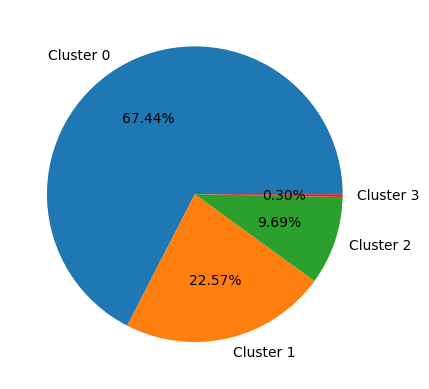

In [57]:
plt.pie(x=[len(cluster_id_0),len(cluster_id_1),len(cluster_id_2),len(cluster_id_3)],labels=['Cluster 0','Cluster 1','Cluster 2','Cluster 3'],autopct='%.02f%%')
plt.show()

We can see that number of priority customers are only 0.3% of total customers

We have done the clustering efficiently. Now we want to deal with the problem where we have to assign cluster to a new customer.
If the user enter customer details, we need to return him the cluster id to which the customer with given details belong to.
To solve this problem we can use the concept of supervised learning. We have assigned the cluster id to each data point in clustered_df
We can use 'Recency', 'Frequency', 'Monetary' and 'Country' as the independent variable and 'Cluster_id' as dependent variable.
Now we can apply supervised learning algorithm and can create a model which can predict the cluster_id for new customer details.

In [58]:
x = clustered_df.drop('Cluster_id',axis=1)
y = clustered_df['Cluster_id']

In [59]:
x = scaler.fit_transform(x)
x = pd.DataFrame(x)
x.columns = ['Recency','Frequency','Monetary','Country_encoded']
x.head()

,Recency,Frequency,Monetary,Country_encoded
0,2.379250,-0.426520,-0.230751,0.329280
1,-0.891620,0.426990,0.282372,-3.078021
2,-0.154665,-0.291755,-0.000977,-3.073188
3,-0.720000,-0.104582,-0.032216,-3.072171
4,2.217725,-0.374111,-0.202156,-3.069505


In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [71]:
from sklearn.svm import SVC
svc_cls = SVC()
svc_cls.fit(x_train,y_train)

SVC()

In [72]:
from sklearn.ensemble import RandomForestClassifier
rf_cls = RandomForestClassifier()
rf_cls.fit(x_train,y_train)

RandomForestClassifier()

In [73]:
from sklearn.ensemble import GradientBoostingClassifier
gb_cls = GradientBoostingClassifier()
gb_cls.fit(x_train,y_train)

GradientBoostingClassifier()

In [74]:
from sklearn.ensemble import AdaBoostClassifier
adb_cls = AdaBoostClassifier()
adb_cls.fit(x_train,y_train)

AdaBoostClassifier()

In [76]:
from sklearn.metrics import precision_score,recall_score

In [80]:
print("Precision for SVC : {}".format(precision_score(y_train,svc_cls.predict(x_train),average='weighted')))
print("Recall for SVC : {}".format(recall_score(y_train,svc_cls.predict(x_train),average='weighted')))

Precision for SVC : 0.9988462647822325
Recall for SVC : 0.9988462647822325


In [81]:
print("Precision for Random Forest : {}".format(precision_score(y_train,rf_cls.predict(x_train),average='weighted')))
print("Recall for Random Forest : {}".format(recall_score(y_train,rf_cls.predict(x_train),average='weighted')))

Precision for Random Forest : 1.0
Recall for Random Forest : 1.0


In [82]:
print("Precision for Gradient Boosting : {}".format(precision_score(y_train,gb_cls.predict(x_train),average='weighted')))
print("Recall for Gradient Boosting : {}".format(recall_score(y_train,gb_cls.predict(x_train),average='weighted')))

Precision for Gradient Boosting : 1.0
Recall for Gradient Boosting : 1.0


In [83]:
print("Precision for AdaBoost : {}".format(precision_score(y_train,adb_cls.predict(x_train),average='weighted')))
print("Recall for AdaBoost : {}".format(recall_score(y_train,adb_cls.predict(x_train),average='weighted')))

Precision for AdaBoost : 0.9951356706024845
Recall for AdaBoost : 0.9950966253244881


We can see that Random Forest and Gradient Boosting seems to overfit the dataset. Hence we can use either SVC or AdaBoost.
We will use AdaBoost

In [85]:
clustered_df['CustomerID'] = customer_ids
clustered_df.head()

,Recency,Frequency,Monetary,Country_encoded,Cluster_id,CustomerID
0,325.0,2.0,0.00,361878.0,1,12346.0
1,1.0,116.0,3125.98,182.0,2,12347.0
2,74.0,20.0,1399.80,695.0,2,12348.0
3,18.0,45.0,1209.49,803.0,2,12349.0
4,309.0,9.0,174.20,1086.0,2,12350.0


In [86]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(adb_cls,open('AdaBoost.pkl','wb'))
pickle.dump(value_cnts,open('Country_Codes.pkl','wb'))
pickle.dump(clustered_df,open('Customer_dataset.pkl','wb'))